# Анализ паблика Вконтакте  для SMM-отдела

## 1. Открытие файлов с данными, изучение информации, коррекция данных

In [60]:
import math
import requests
import numpy as np
import pandas as pd
import plotly.graph_objs as go

# Импорт библиотеки DateTime
from datetime import datetime

In [19]:
# создадим функцию, чтобы отправлять JSON-запросы к API VK
def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [20]:
vk_token = # запрещено выкладывать
url = # запрещено выкладывать
response = getjson(url)
print(response)

{'error': {'error_code': 5, 'error_msg': 'User authorization failed: access_token was given to another ip address.', 'request_params': [{'key': 'v', 'value': '5.92'}, {'key': 'method', 'value': 'account.getProfileInfo'}, {'key': 'oauth', 'value': '1'}]}}


Несколько недель назад S запустили рекламу с Сергеем Буруновым, это впервые для S привлекать звезду. Интересно оценить эффективность рекламы. В группе в ВК, каждый день по 2-3 поста. Возьмем данные c начала ноября

In [21]:
# получаем последнюю запись из паблика Skillbox Вконтакте
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=1&v=5.92'
response = getjson(url)

In [22]:
# сдвигаем запрос и получаем предпоследнюю запись из паблика Skillbox Вконтакте
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=1&count=33&v=5.92'
response2 = getjson(url)
print(response2)

{'error': {'error_code': 5, 'error_msg': 'User authorization failed: access_token was given to another ip address.', 'request_params': [{'key': 'owner_id', 'value': '-66669811'}, {'key': 'offset', 'value': '1'}, {'key': 'count', 'value': '33'}, {'key': 'v', 'value': '5.92'}, {'key': 'method', 'value': 'wall.get'}, {'key': 'oauth', 'value': '1'}]}}


In [32]:
# преобразуем вложенный файл JSON в датафрейме за выбранный период c помощью pd.json_normalize
#df = pd.json_normalize(response2['response']['items'])
#df.head()

In [33]:
# сохраним полученный датафрейм, чтобы не было необходимости использовать токен для обращения к анализируемому периоду
# df.to_csv('vk_group_skillbox.csv')

In [39]:
# загрузим содержимое файла vk_group_skillbox.csv
data = pd.read_csv('vk_group_skillbox.csv')

### Предобработка данных

In [44]:
# создадим новый датафрейме, оставив только те столбцы, которые актуальны
pd.options.display.max_colwidth = 210
df= data[['date', 'text', 'comments.count', 'likes.count','reposts.count','views.count']]
df.head()

,date,text,comments.count,likes.count,reposts.count,views.count
0,1666606890,"Однажды Александра обнаружила, что звуки гуслей убаюкивают ее детей.\n\nОткрытие заставило ее придумать отдельное музыкальное направление — гуслитерапию. После записи дебютного альбома и курса Skillbox Алек...",3,18,5,12088
1,1666596169,"Расписание новых бесплатных вебинаров на конец октября.\n\nСемь актуальных тем, разбору которых посвятим три дня, — выбирайте, что интересно вам, и регистрируйтесь.\n\nСсылку на трансляцию интенсива обычно ...",0,10,15,11747
2,1666348591,"Тимур Татлыев дважды менял работу из-за санкций.\n\nВ 2014 году его сократили, а после событий 24 февраля Тимур сам просчитал последствия и не стал ждать — пошел учиться и вовремя нашел новое место.\n\nПоче...",0,36,18,42344
3,1666340424,Что происходит в игровой индустрии? Какие специалисты наиболее востребованы? И как вести коммуникацию с международными издателями?\n23 октября в 14:00 мы проведем онлайн-лекцию о ситуации на мировом рынке и...,0,18,8,19074
4,1666279077,Ловим волну Hate.fm!\n\nВ рамках спецпроекта с Sostav мы запустили «Азбуку хейта» — словарь не самых позитивных комментариев от клиента.\n\nСобрали несколько терминов из азбуки в карточках — читайте! И дели...,1,32,9,21069


In [45]:
date = 1566840605
# преобразуем дату и время с помощью вызова функций и класса datetime
def date(date):
    return (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')

# отдельно найдем количество часов для удобства расчетов для  дальнейшего анализа
def hour(date):
    return (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%H')

In [51]:
# создадим новый датафрейм
data_vk = df.copy()

# применям метод и меняем столбец с датой
data_vk['dates'] = data_vk['date'].apply(date)
data_vk['hour'] = data_vk['date'].apply(hour)

data_vk.head()

,date,text,comments.count,likes.count,reposts.count,views.count,dates,hour
0,1666606890,"Однажды Александра обнаружила, что звуки гуслей убаюкивают ее детей.\n\nОткрытие заставило ее придумать отдельное музыкальное направление — гуслитерапию. После записи дебютного альбома и курса Skillbox Алек...",3,18,5,12088,2022-10-24 17:21:30,17
1,1666596169,"Расписание новых бесплатных вебинаров на конец октября.\n\nСемь актуальных тем, разбору которых посвятим три дня, — выбирайте, что интересно вам, и регистрируйтесь.\n\nСсылку на трансляцию интенсива обычно ...",0,10,15,11747,2022-10-24 14:22:49,14
2,1666348591,"Тимур Татлыев дважды менял работу из-за санкций.\n\nВ 2014 году его сократили, а после событий 24 февраля Тимур сам просчитал последствия и не стал ждать — пошел учиться и вовремя нашел новое место.\n\nПоче...",0,36,18,42344,2022-10-21 17:36:31,17
3,1666340424,Что происходит в игровой индустрии? Какие специалисты наиболее востребованы? И как вести коммуникацию с международными издателями?\n23 октября в 14:00 мы проведем онлайн-лекцию о ситуации на мировом рынке и...,0,18,8,19074,2022-10-21 15:20:24,15
4,1666279077,Ловим волну Hate.fm!\n\nВ рамках спецпроекта с Sostav мы запустили «Азбуку хейта» — словарь не самых позитивных комментариев от клиента.\n\nСобрали несколько терминов из азбуки в карточках — читайте! И дели...,1,32,9,21069,2022-10-20 22:17:57,22


In [52]:
# удалим теперь не нужный для нас столбец date

del data_vk['date']

# переименуем столбцы
data_vk = data_vk.rename(columns={'comments.count':'comments_count', 'likes.count':'likes_count', 'reposts.count':'reposts_count', 'views.count':'views_count'})
data_vk.head()

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
0,"Однажды Александра обнаружила, что звуки гуслей убаюкивают ее детей.\n\nОткрытие заставило ее придумать отдельное музыкальное направление — гуслитерапию. После записи дебютного альбома и курса Skillbox Алек...",3,18,5,12088,2022-10-24 17:21:30,17
1,"Расписание новых бесплатных вебинаров на конец октября.\n\nСемь актуальных тем, разбору которых посвятим три дня, — выбирайте, что интересно вам, и регистрируйтесь.\n\nСсылку на трансляцию интенсива обычно ...",0,10,15,11747,2022-10-24 14:22:49,14
2,"Тимур Татлыев дважды менял работу из-за санкций.\n\nВ 2014 году его сократили, а после событий 24 февраля Тимур сам просчитал последствия и не стал ждать — пошел учиться и вовремя нашел новое место.\n\nПоче...",0,36,18,42344,2022-10-21 17:36:31,17
3,Что происходит в игровой индустрии? Какие специалисты наиболее востребованы? И как вести коммуникацию с международными издателями?\n23 октября в 14:00 мы проведем онлайн-лекцию о ситуации на мировом рынке и...,0,18,8,19074,2022-10-21 15:20:24,15
4,Ловим волну Hate.fm!\n\nВ рамках спецпроекта с Sostav мы запустили «Азбуку хейта» — словарь не самых позитивных комментариев от клиента.\n\nСобрали несколько терминов из азбуки в карточках — читайте! И дели...,1,32,9,21069,2022-10-20 22:17:57,22


In [53]:
data_vk['dates'] = data_vk['dates'].astype('datetime64[ms]')
data_vk['hour'] = data_vk['hour'].astype('int64')
data_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   text            33 non-null     object        
 1   comments_count  33 non-null     int64         
 2   likes_count     33 non-null     int64         
 3   reposts_count   33 non-null     int64         
 4   views_count     33 non-null     int64         
 5   dates           33 non-null     datetime64[ns]
 6   hour            33 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.9+ KB


Вывод:
- Из паблика в ВК были извлечены данные о постах за последние 30 дней.
- Преобразовали дату и время
- Отдельным столбиком вынесено время публикации 
- Данные с временем были исправлены на удобный тип данных 
- Пустых значений нет, они автоматически представлены в виде 0

## 2.Анализ факторов

### Гипотеза: Влияет ли время публикации на охват аудитории 

Расмотрим взаимосвязь времени публикации поста и вовлеченности пользователей.

In [56]:
# Посмотрим на медианы данных, т.к данные не однородны - это вариант эффективнее 
print (data_vk['comments_count'].median())
print(data_vk['likes_count'].median())
print(data_vk['reposts_count'].median())
print(data_vk['views_count'].median())
print(data_vk['hour'].median())

0.0
32.0
13.0
26381.0
16.0


In [57]:
data_vk['views_count'].describe()

count       33.000000
mean     27620.333333
std      12740.432674
min      11747.000000
25%      18706.000000
50%      26381.000000
75%      35276.000000
max      62692.000000
Name: views_count, dtype: float64

In [59]:
# отберем публикации, которые собрали просмотров больше, чем медианное значение
vk = data_vk.query('views_count  > 26381').sort_values('views_count',ascending=False)
vk.head()

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
6,Хотите лучше понимать своих детей? А научиться совмещать работу и семейную жизнь? \n\nТогда 25 октября приглашаем на бесплатную конференцию «Родительство как профессия: что нужно знать и уметь мамам и папам...,1,27,14,62692,2022-10-20 16:13:13,16
12,"Что бы такого поделать на этой неделе — интересного, полезного и желательно бесплатного?\n\nУ нас есть примерно девять идей — по одной на каждый из наших бесплатных вебинаров. Выбирайте тему, которая вас ин...",2,39,54,51509,2022-10-17 17:15:36,17
24,"После череды травм Николай Бушуев решил уйти из баскетбола.\n\nС тренерским образованием оказалось непросто найти себя вне спорта.\n\nКарьера в «Сбербанке» не сложилась, поэтому Николай решил сменить профес...",13,58,32,50585,2022-10-07 15:00:24,15
13,"К обзору востребованных IT-профессий готовы! \n\n19 октября в 19:00 к нам в Skillbox придет Сергей Бурунов, чтобы обнажить всю «подноготную» онлайн-образования, узнать, какие профессии входят в IT и реально...",9,68,27,42721,2022-10-15 14:42:39,14
2,"Тимур Татлыев дважды менял работу из-за санкций.\n\nВ 2014 году его сократили, а после событий 24 февраля Тимур сам просчитал последствия и не стал ждать — пошел учиться и вовремя нашел новое место.\n\nПоче...",0,36,18,42344,2022-10-21 17:36:31,17


Вывод:
- В ВК публикуют записи 2 раза в день. После 14 часов и 19. Пять самых популярных записей опубликованы после 14 часов. 
- Да, время публикации важно.

**Построим графики зависимости времени публикации и количества репостов, комментариев, лайков, просмотров**

In [85]:
fig = go.Figure()
pull = [0]*len(vk['reposts_count'])
pull[vk['reposts_count'].tolist().index(vk['reposts_count'].max())] = 0.2
fig.add_trace(go.Pie(values=vk['reposts_count'], labels=vk['hour'], pull=pull))
fig.update_layout(title="График зависимости времени публикации и количества репостов", legend_orientation="h")
#fig.show()

fig = go.Figure()
pull = [0]*len(vk['comments_count'])
pull[vk['comments_count'].tolist().index(vk['comments_count'].max())] = 0.2
#fig.add_trace(go.Pie(values=vk['comments_count'], labels=vk['hour'], pull=pull))
#fig.update_layout(title="График зависимости времени публикации и количества комментариев", legend_orientation="h")
#fig.show()

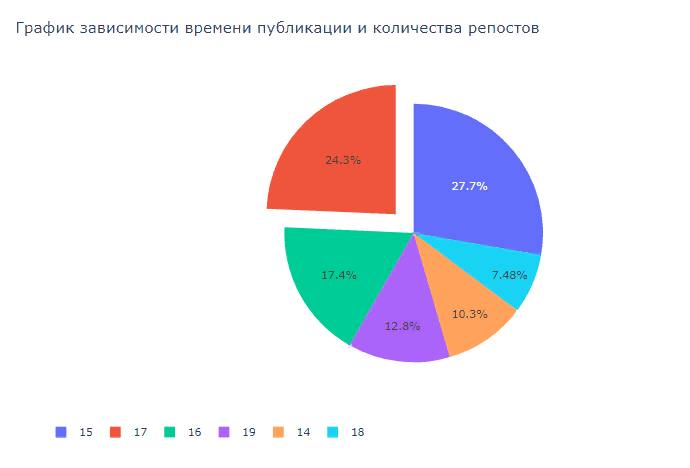

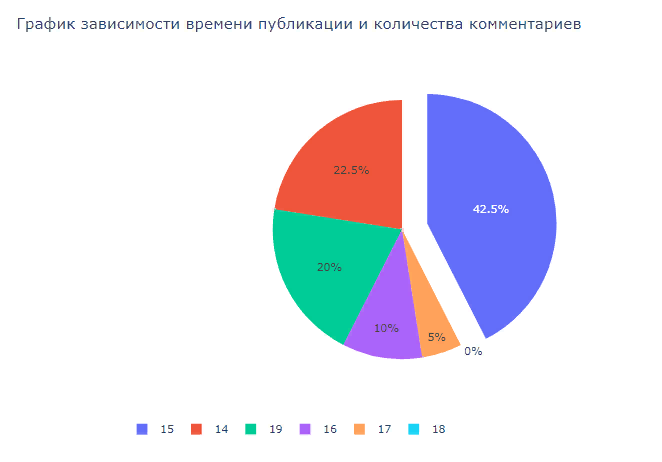

In [83]:
fig = go.Figure()
pull = [0]*len(vk['likes_count'])
pull[vk['likes_count'].tolist().index(vk['likes_count'].max())] = 0.2
fig.add_trace(go.Pie(values=vk['likes_count'], labels=vk['hour'], pull=pull))
fig.update_layout(title="График зависимости времени публикации и количества лайков", legend_orientation="h")
#fig.show()

fig = go.Figure()
pull = [0]*len(vk['views_count'])
pull[vk['views_count'].tolist().index(vk['views_count'].max())] = 0.2
#fig.add_trace(go.Pie(values=vk['views_count'], labels=vk['hour'], pull=pull))
#fig.update_layout(title="График зависимости времени публикации и количества просмотров", legend_orientation="h")
#fig.show()

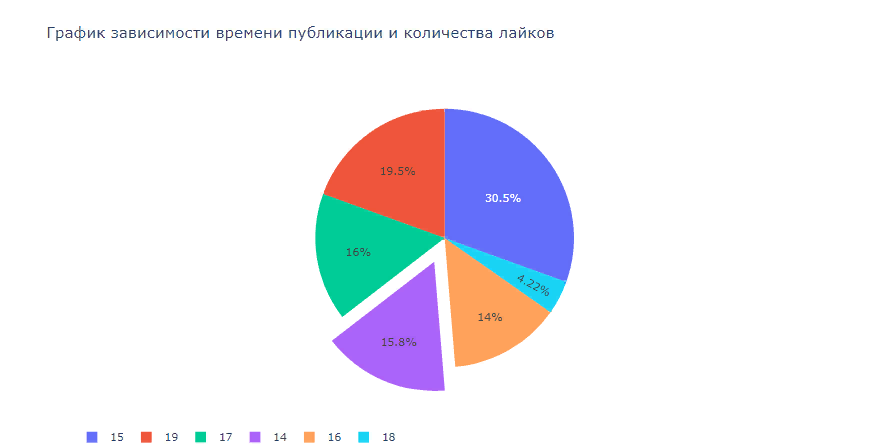

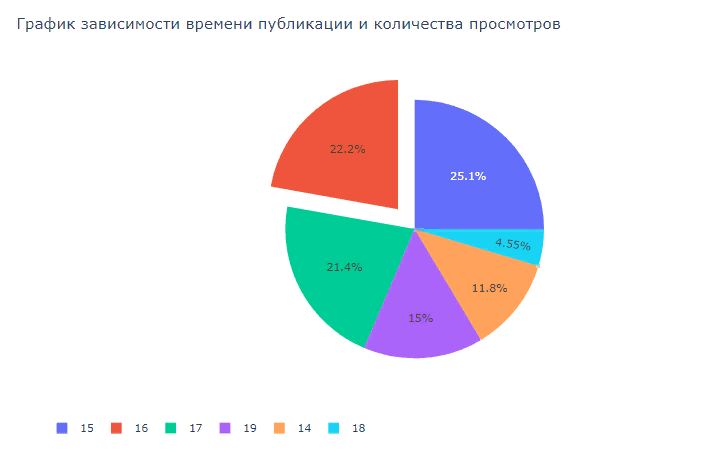

Вывод:
- По графикам очевидно, что самое популярное время по активностям пользователей - это 15 часов
- Самое не актуальное время для публикации - 18 часов

**Рассмотрим посты, которые выше медианных значений. Сравним с полученным выводом** 

In [63]:
# пересчитаем медиану
print (vk['comments_count'].median())
print(vk['likes_count'].median())
print(vk['reposts_count'].median())
print(vk['views_count'].median())
print(vk['hour'].median())

0.5
36.5
19.0
35382.5
16.0


In [64]:
df_vk= vk.query('likes_count > 36.5 & comments_count > 0.5 & reposts_count > 19 & views_count > 35382.5') \
              .sort_values('views_count',ascending=False)
df_vk

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
12,"Что бы такого поделать на этой неделе — интересного, полезного и желательно бесплатного?\n\nУ нас есть примерно девять идей — по одной на каждый из наших бесплатных вебинаров. Выбирайте тему, которая вас ин...",2,39,54,51509,2022-10-17 17:15:36,17
24,"После череды травм Николай Бушуев решил уйти из баскетбола.\n\nС тренерским образованием оказалось непросто найти себя вне спорта.\n\nКарьера в «Сбербанке» не сложилась, поэтому Николай решил сменить профес...",13,58,32,50585,2022-10-07 15:00:24,15
13,"К обзору востребованных IT-профессий готовы! \n\n19 октября в 19:00 к нам в Skillbox придет Сергей Бурунов, чтобы обнажить всю «подноготную» онлайн-образования, узнать, какие профессии входят в IT и реально...",9,68,27,42721,2022-10-15 14:42:39,14


Вывод:
- Cамые популярные посты опубликованы в обеденный перерыв с 14 до 15

## 3.Аналитика по рубрикам

### Гипотеза:  влияет ли тема рубрики (тег) на популярность поста

Рубрики у Skillbox отмечены хештегами в конце поста. Посты с Сергеем Буруновым не были отмечены хештегами, поэтому поиск будет осуществляется по фамилии. Это может быть связано с тем , что акция является одноразовой.Так же есть постоянные вебинары , не отмеченные # 

In [65]:
y_text = vk['text'].tolist()
# найдем все теги, которые есть в постах, где количество просмотров выше медианного значения с помощью регулярных выражений
textlookfor = r"#\w+\b" # слова с заглавной
hashtag = re.findall(textlookfor, str(y_text))
print(hashtag)

['#Skilbox_программирование', '#Skillbox_управление', '#Skillbox_дизайн', '#Skillbox_киноимузыка', '#ДеньДЦП', '#Skillbox_дизайн', '#Skillbox_высшее_образование']


#ДеньДЦП это всероссийская акция в которой принимал Skillbox, не является постоянной рубрикой. Далее не рассматриваем

In [68]:
# найдем посты, которые содержат наши теги в тексте и создадим новый датасет для построения графиков
program = data_vk[data_vk['text'].str.contains('#Skilbox_программирование')]
program_median = pd.DataFrame(program.median()).T

manag = data_vk[data_vk['text'].str.contains('#Skillbox_управление')]
manag_median = pd.DataFrame(manag.median()).T

design =data_vk[data_vk['text'].str.contains('#Skillbox_дизайн')]
design_median = pd.DataFrame(design.median()).T

art = data_vk[data_vk['text'].str.contains('#Skillbox_киноимузыка')]
art_median = pd.DataFrame(art.median()).T

education = data_vk[data_vk['text'].str.contains('#Skillbox_высшее_образование')]
education_median = pd.DataFrame(education.median()).T

promo = data_vk[data_vk['text'].str.contains('Бурун')]
promo_median = pd.DataFrame(promo.median()).T

webinar = data_vk[data_vk['text'].str.contains('вебинар')]
webinar_median = pd.DataFrame(webinar.median()).T

C:\Users\User01\AppData\Local\Temp\ipykernel_4200\3126475727.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\User01\AppData\Local\Temp\ipykernel_4200\3126475727.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User01\AppData\Local\Temp\ipykernel_4200\3126475727.py:6: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\User01\AppData\Local\Temp\ipykernel_4200\3126475727.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users

In [69]:
#Удаляем рубрики не актуальные и дубликат
hashtag.remove('#Skillbox_дизайн')
hashtag.remove('#ДеньДЦП')

In [70]:
# Добавляем рубрики по ключевым словам
hashtag.append('Бурун')
hashtag.append('вебинар')
print(hashtag)

['#Skilbox_программирование', '#Skillbox_управление', '#Skillbox_киноимузыка', '#Skillbox_дизайн', '#Skillbox_высшее_образование', 'Бурун', 'вебинар']


In [71]:
# Посты из рубрики #Skilbox_программирование
program

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
24,"После череды травм Николай Бушуев решил уйти из баскетбола.\n\nС тренерским образованием оказалось непросто найти себя вне спорта.\n\nКарьера в «Сбербанке» не сложилась, поэтому Николай решил сменить профес...",13,58,32,50585,2022-10-07 15:00:24,15


In [72]:
# Посты из рубрики #Skillbox_управление
manag

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
2,"Тимур Татлыев дважды менял работу из-за санкций.\n\nВ 2014 году его сократили, а после событий 24 февраля Тимур сам просчитал последствия и не стал ждать — пошел учиться и вовремя нашел новое место.\n\nПоче...",0,36,18,42344,2022-10-21 17:36:31,17


In [73]:
# Посты из рубрики #Skillbox_дизайн
design

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
8,Задача: разработать дизайн карточки товара.\n\nКлиент: магазин кроссовок.\n\nДедлайн: через 3 дня.\n\nС таким ТЗ мы недавно провели очередной дизайн-спринт для наших пользователей. И на выходе получили мног...,0,53,20,37798,2022-10-19 15:44:49,15
16,У вас всего три дня — успеете создать классный проект?\n\nДля пользователей наших курсов мы регулярно проводим дизайн-спринты: когда за короткий срок нужно сделать полноценную работу по брифу в сопровождени...,0,41,6,28499,2022-10-13 14:00:28,14
30,"«И чему вас только в школе учат?»\n\nТакой вопрос загонит в тупик кого угодно, только не наших пользователей! Они-то всегда могут рассказать и показать, чему их учат.\n\nСобрали для вас шоурил с работами уч...",0,28,8,24022,2022-10-04 14:54:05,14


In [74]:
# Посты из рубрики #Skillbox_киноимузыка
art

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
0,"Однажды Александра обнаружила, что звуки гуслей убаюкивают ее детей.\n\nОткрытие заставило ее придумать отдельное музыкальное направление — гуслитерапию. После записи дебютного альбома и курса Skillbox Алек...",3,18,5,12088,2022-10-24 17:21:30,17
15,"Они начали свой творческий путь в начале 00-х и добились известности во всем мире.\n\nMujuice, Нина Кравиц, Motorama — мы взяли лишь малую часть из того огромного созвездия электронных исполнителей России, ...",3,32,18,34317,2022-10-13 16:50:23,16


In [75]:
# Посты из рубрики #Skillbox_высшее_образование
education

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
5,"Впереди еще целый месяц!\n\nМесяц — для того, чтобы подать документы в онлайн-бакалавриат и магистратуру, организованную нами совместно с РАНХиГС. \n\nНа выбор — три заочных программы высшего образования по...",0,29,24,27490,2022-10-20 18:53:16,18


In [76]:
# Посты из рубрики Сергей Бурунов
promo

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
7,"Уже поставили напоминалку на 19:00?\n\nЕсли нет — напомним мы! Сегодня Сергей Бурунов придет в Skillbox, чтобы провести образовательное расследование.\n\nОн узнает, чем занимаются программисты, маркетологи ...",0,16,13,11834,2022-10-19 18:39:47,18
9,Реально ли освоить IT-профессию на онлайн-курсах? Какие специальности сейчас самые востребованные? И берут ли на работу в IT без опыта?\n\nУ Сергея Бурунова к нам много вопросов! И он проведет целое образов...,0,33,8,27980,2022-10-18 19:33:15,19
11,"Сергей Бурунов меняет профессию — в прямом эфире!\n\nБез шуток: 19 октября в 19:00 состоится большое образовательное расследование, где Сергей не только познакомится с внутренней кухней Skillbox, но и попро...",0,26,13,19613,2022-10-17 21:38:27,21
13,"К обзору востребованных IT-профессий готовы! \n\n19 октября в 19:00 к нам в Skillbox придет Сергей Бурунов, чтобы обнажить всю «подноготную» онлайн-образования, узнать, какие профессии входят в IT и реально...",9,68,27,42721,2022-10-15 14:42:39,14
17,"Реально ли освоить новую профессию на онлайн-курсах? Или это маркетинговая уловка?\n\nС этим разберется Сергей Бурунов: 19 октября в 19:00 он проведет большое образовательное расследование. Сергей узнает, ч...",0,25,6,12817,2022-10-12 18:53:48,18
20,"19 октября образовательный детектив Сергей Бурунов устроит для Skillbox допрос с пристрастием.\n\nНам предстоит ответить на самые каверзные вопросы, развенчать застарелые мифы — и вообще защитить нашу честь...",1,15,3,26263,2022-10-11 14:40:12,14
23,"У Сергея Бурунова есть кредо: доверять, но проверять. А у нас — быть с душой нараспашку.\n\nПоэтому 19 октября мы проведем большой эфир-расследование, где Сергей Бурунов выступит в роли образовательного дет...",1,36,4,27089,2022-10-07 19:12:25,19
26,"Можно ли освоить IT-профессию на онлайн-курсах? Правда ли, что без каких-то особенных знаний и талантов делать в IT нечего? Пора узнать всю правду и развеять мифы! \n\nИ за это дело возьмется Сергей Бурунов...",26,46,25,24500,2022-10-05 19:14:05,19


In [77]:
# Посты из рубрики Вебинары
webinar

,text,comments_count,likes_count,reposts_count,views_count,dates,hour
1,"Расписание новых бесплатных вебинаров на конец октября.\n\nСемь актуальных тем, разбору которых посвятим три дня, — выбирайте, что интересно вам, и регистрируйтесь.\n\nСсылку на трансляцию интенсива обычно ...",0,10,15,11747,2022-10-24 14:22:49,14
12,"Что бы такого поделать на этой неделе — интересного, полезного и желательно бесплатного?\n\nУ нас есть примерно девять идей — по одной на каждый из наших бесплатных вебинаров. Выбирайте тему, которая вас ин...",2,39,54,51509,2022-10-17 17:15:36,17
22,"Свежее расписание бесплатных вебинаров на эту неделю!\n\nИзучайте темы, выбирайте то, что вам интересно, и регистрируйтесь по ссылке. Ссылку на трансляцию интенсива пришлем за 20 минут до его начала.\n\n10–...",0,37,24,37073,2022-10-10 16:53:56,16
31,"Подготовили для вас расписание бесплатных вебинаров на неделю вперед.\n\nУчеба — хороший способ справиться с тревогой и навязчивыми мыслями. Поэтому выбирайте интересную вам тему, регистрируйтесь и ждите сс...",0,32,29,33194,2022-10-03 15:06:18,15


Разбив посты на рубрики видно, как они неравномерны. Так как в этом месяце делался уклон на рекламу с Сергеем Буруновым , то это имеет объяснение. Они не стали увеличивать количество постов в день. 
Проанализировав тест постов, можно сделать оценку, что истории об успехе после образования имеют хорошую популярность.


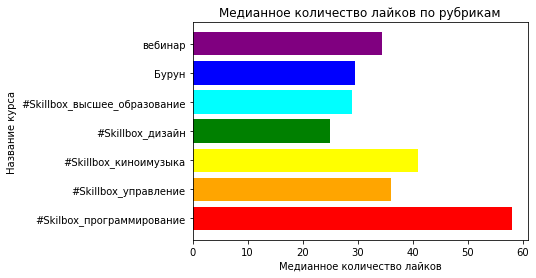

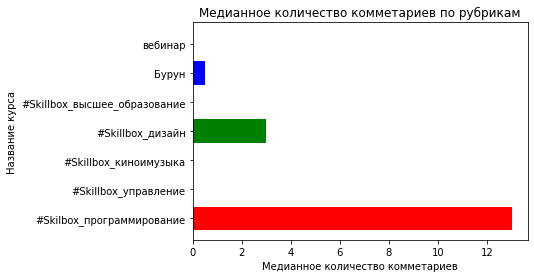

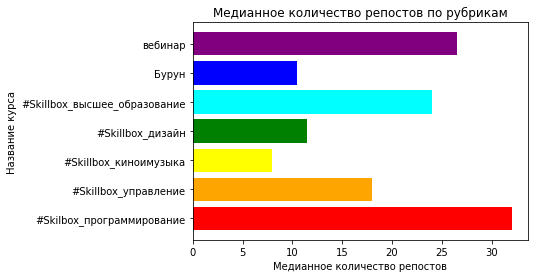

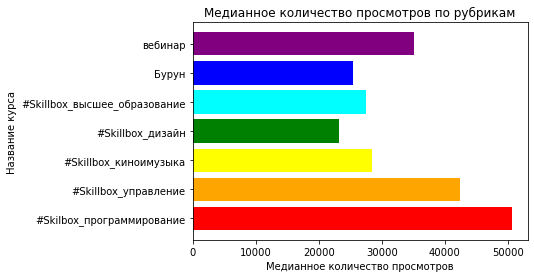

In [79]:
#Цветовая политра столбцов
clr = ('red','orange','yellow','green','cyan','blue','purple')

# График для лайков 
likes = [program_median.loc[0, 'likes_count'], manag_median.loc[0, 'likes_count'], 
    design_median.loc[0, 'likes_count'], art_median.loc[0, 'likes_count'], 
    education_median.loc[0, 'likes_count'], promo_median.loc[0, 'likes_count'], webinar_median.loc[0, 'likes_count']]

fig, subplot = plt.subplots()
subplot.barh(hashtag, likes, color = clr )
# Вывод подписей делений оси абсцисс
plt.xticks(rotation='horizontal')
subplot.set_title("Медианное количество лайков по рубрикам")
# Вывод названия осей
subplot.set(xlabel='Медианное количество лайков', ylabel='Название курса');

# График для комментариев
comme = [program_median.loc[0, 'comments_count'], manag_median.loc[0, 'comments_count'], 
    design_median.loc[0, 'comments_count'], art_median.loc[0, 'comments_count'], 
    education_median.loc[0, 'comments_count'], promo_median.loc[0, 'comments_count'], webinar_median.loc[0, 'comments_count']]

fig, subplot = plt.subplots()
subplot.barh(hashtag, comme, color = clr )
# Вывод подписей делений оси абсцисс
plt.xticks(rotation='horizontal')
subplot.set_title("Медианное количество комметариев по рубрикам")
# Вывод названия осей
subplot.set(xlabel='Медианное количество комметариев', ylabel='Название курса');

# График для репостов
re = [program_median.loc[0, 'reposts_count'], manag_median.loc[0, 'reposts_count'], 
    design_median.loc[0, 'reposts_count'], art_median.loc[0, 'reposts_count'], 
    education_median.loc[0, 'reposts_count'], promo_median.loc[0, 'reposts_count'], webinar_median.loc[0, 'reposts_count']]

fig, subplot = plt.subplots()
subplot.barh(hashtag, re, color = clr )
# Вывод подписей делений оси абсцисс
plt.xticks(rotation='horizontal')
subplot.set_title("Медианное количество репостов по рубрикам")
# Вывод названия осей
subplot.set(xlabel='Медианное количество репостов', ylabel='Название курса');

# График для просмотров
re = [program_median.loc[0, 'views_count'], manag_median.loc[0, 'views_count'], 
    design_median.loc[0, 'views_count'], art_median.loc[0, 'views_count'], 
    education_median.loc[0, 'views_count'], promo_median.loc[0, 'views_count'], webinar_median.loc[0, 'views_count']]
fig, subplot = plt.subplots()
subplot.barh(hashtag, re, color = clr )
# Вывод подписей делений оси абсцисс
plt.xticks(rotation='horizontal')
subplot.set_title("Медианное количество просмотров по рубрикам")
# Вывод названия осей
subplot.set(xlabel='Медианное количество просмотров', ylabel='Название курса');

Выводы:
- По всем показателям рубрика по программированию #Skilbox_программирование самая эффективная. Анализ вовлеченности пользователей по данной рубрике, за весь период ее публикации, показывает наибольшую активность; 
- Популярность обусловлена тем, что пост выпушен в период времени с 14-15 часов. Это пик активности пользователей.  информация об успехе человека после прохождения курсов тоже ключевой фактор популярности;
- Из анализа рекламных постов с Буруновым , можно сделать выводы о не высокой эффективности. Основная проблема заключается в том, что 6 из 8 публикации были выпущены после 18 часов. Вечернее время имеет низкие показатели; 
- Стоит отметить что посты с вебенарами являются одними из лидирующих по показателям активности пользователей. Причины могу быть связанны с тем, что это бесплатно. Только 1 из 4 был выпушен в период максимальной активности с 14-15 часов, т.е. время публикации было здесь не решающим фактором.

Рекомендации для SMM:
- Если будет еще реклама со звездой, то внимание стоит обратить на время публикации. Чтоб охват аудитории был выше;
- Время публикации вебинаров не важно. Люди ими будут интересоваться, т.к. это бесплатный источник информации;
- История про баскетболиста по теку #Skilbox_программирование и история человека который в карантин поменял жизнь из тега #Skillbox_управление имеют хороший результат по показателям. Стоит подобные истории выпускать чаще.